In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_joint_info(file_path):
    header_end_line_num = 0
    with open(file_path, 'r') as file:
        for line_num, line in enumerate(file, 1):
            if 'endheader' in line.strip().lower():
                header_end_line_num = line_num
                break

    # Step 2: Reading Column Labels which is the first line after `endheader`
    with open(file_path, 'r') as file:
        for line_num, line in enumerate(file, 1):
            if line_num == header_end_line_num + 1:
                column_labels = line.strip().split('\t')
                break

    # Step 3: Loading the Data into a pandas DataFrame
    df = pd.read_csv(file_path, skiprows=header_end_line_num + 1, sep='\t', names=column_labels)
    time = df['time'].to_numpy()

    hip_flexion_r = df['hip_flexion_r'].to_numpy()
    hip_flexion_l = df['hip_flexion_l'].to_numpy()
    ankle_angle_r = df['ankle_angle_r'].to_numpy()
    ankle_angle_l = df['ankle_angle_l'].to_numpy()
    knee_angle_r = -df['knee_angle_r'].to_numpy()
    knee_angle_l = -df['knee_angle_l'].to_numpy()

    return time,hip_flexion_l,hip_flexion_r, ankle_angle_l, ankle_angle_r, knee_angle_l, knee_angle_r

In [3]:
time, hip_flexion_r, hip_flexion_l, ankle_angle_r, ankle_angle_l , knee_angle_l, knee_angle_r= [], [], [], [], [], [], []

 
# import required module
import os
# assign directory
directory = './Motion_Data'
 
# iterate over files in
# that directory
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(f):
        results = get_joint_info(f)
        time.append(results[0])
        hip_flexion_l.append(results[1])
        hip_flexion_r.append(results[2])
        ankle_angle_l.append(results[3])
        ankle_angle_r.append(results[4])
        knee_angle_l.append(results[5])
        knee_angle_r.append(results[6])
        print(f)

./Motion_Data\posterior_1_1 (2).mot
./Motion_Data\posterior_1_1 (3).mot
./Motion_Data\posterior_1_1 (4).mot
./Motion_Data\posterior_1_1 (5).mot
./Motion_Data\posterior_1_1 (6).mot
./Motion_Data\posterior_1_1 (7).mot
./Motion_Data\posterior_1_1 (8).mot
./Motion_Data\posterior_1_1 (9).mot
./Motion_Data\posterior_1_1.mot
./Motion_Data\posterior_1_2 (2).mot
./Motion_Data\posterior_1_2 (3).mot
./Motion_Data\posterior_1_2 (4).mot
./Motion_Data\posterior_1_2 (5).mot
./Motion_Data\posterior_1_2 (6).mot
./Motion_Data\posterior_1_2 (7).mot
./Motion_Data\posterior_1_2 (8).mot
./Motion_Data\posterior_1_2 (9).mot
./Motion_Data\posterior_1_2.mot
./Motion_Data\posterior_1_3 (2).mot
./Motion_Data\posterior_1_3 (3).mot
./Motion_Data\posterior_1_3 (4).mot
./Motion_Data\posterior_1_3.mot
./Motion_Data\posterior_1_4.mot


In [4]:
def find_max_min_2d_list(lst_2d):
    # Flatten the 2D list into a 1D list of all numeric values
    all_values = [item for sublist in lst_2d for item in sublist]
    
    # Find the maximum and minimum values
    max_value = max(all_values) if all_values else None
    min_value = min(all_values) if all_values else None
    
    return max_value, min_value

time_max, time_min = find_max_min_2d_list(time)
time_length = max(len(sub_array) for sub_array in time) - time_min*100
time_homo = np.linspace(time_max, time_min, int(time_length))

def padding(time, data, time_length):
    time_start, time_end = min(time), max(time)

    # Calculate padding
    start_index = int(time_start * 100)  # Convert time to index
    # Total length for the array should represent 0 to 13 seconds (inclusive), i.e., 1301 indices if we consider both ends
    total_length = int(time_length)
    # Padding before and after
    padding_before = start_index
    # Create the new padded array
    if len(data) > time_length:
        return data[:time_length]
    else:
        padded_array = [data[-1]]*total_length  # Initialize an array of zeros
        padded_array[padding_before:padding_before + len(data)] = data.copy()
    return padded_array

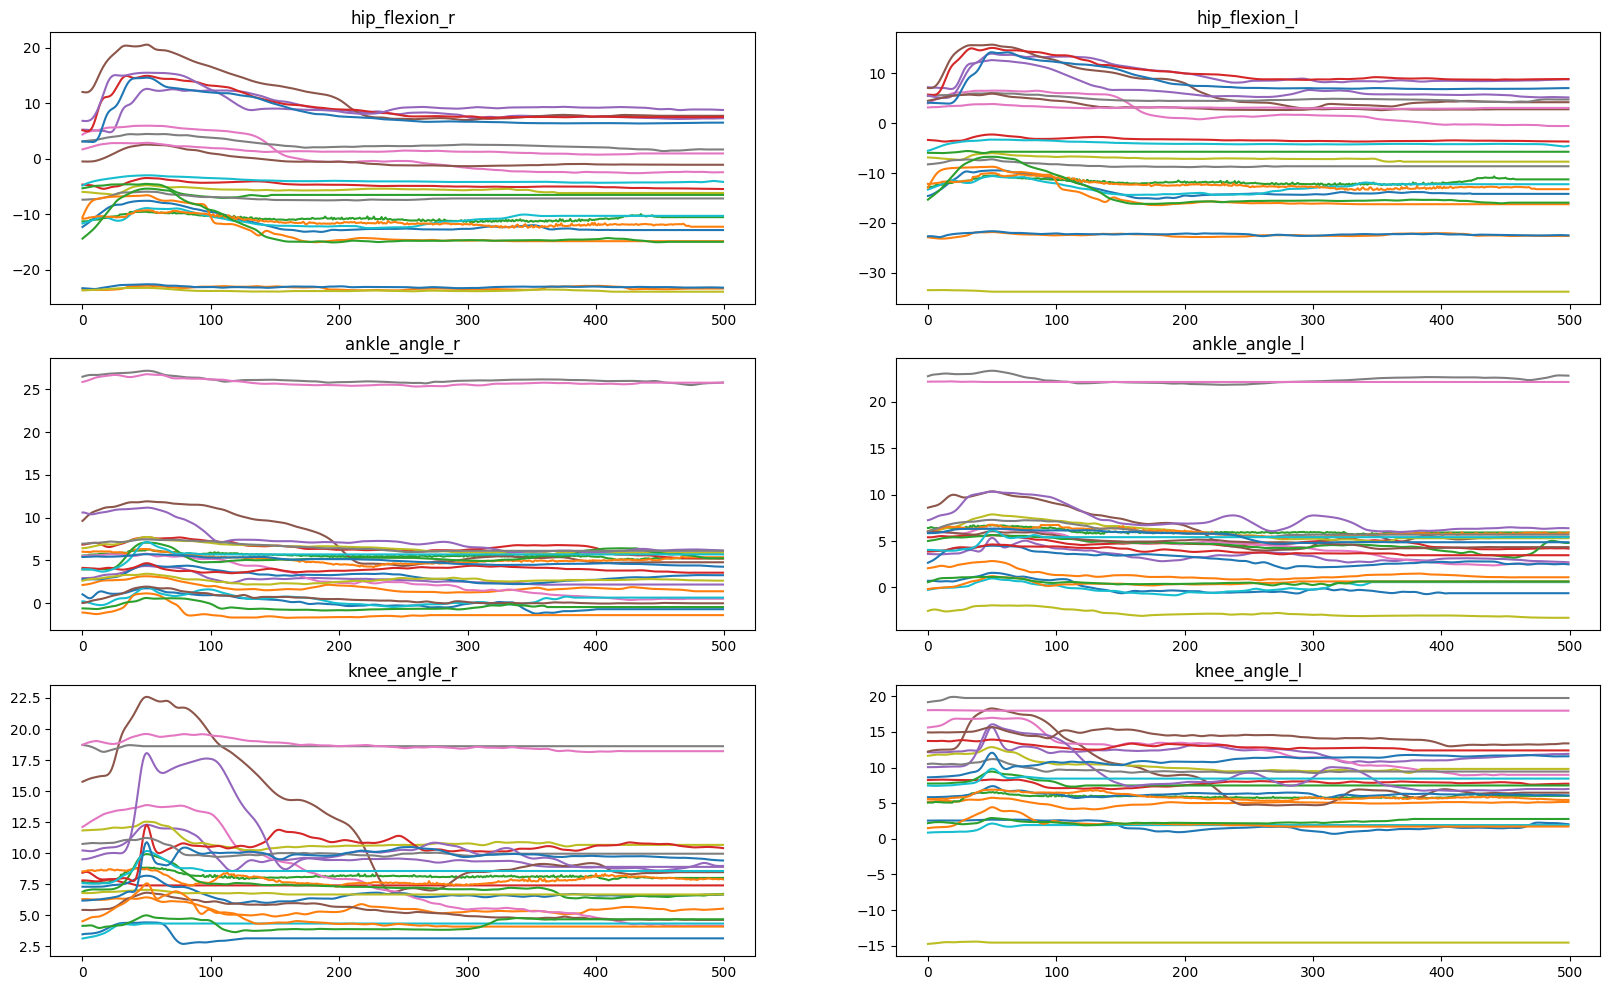

Text(0.5, 1.0, 'knee_angle_l')

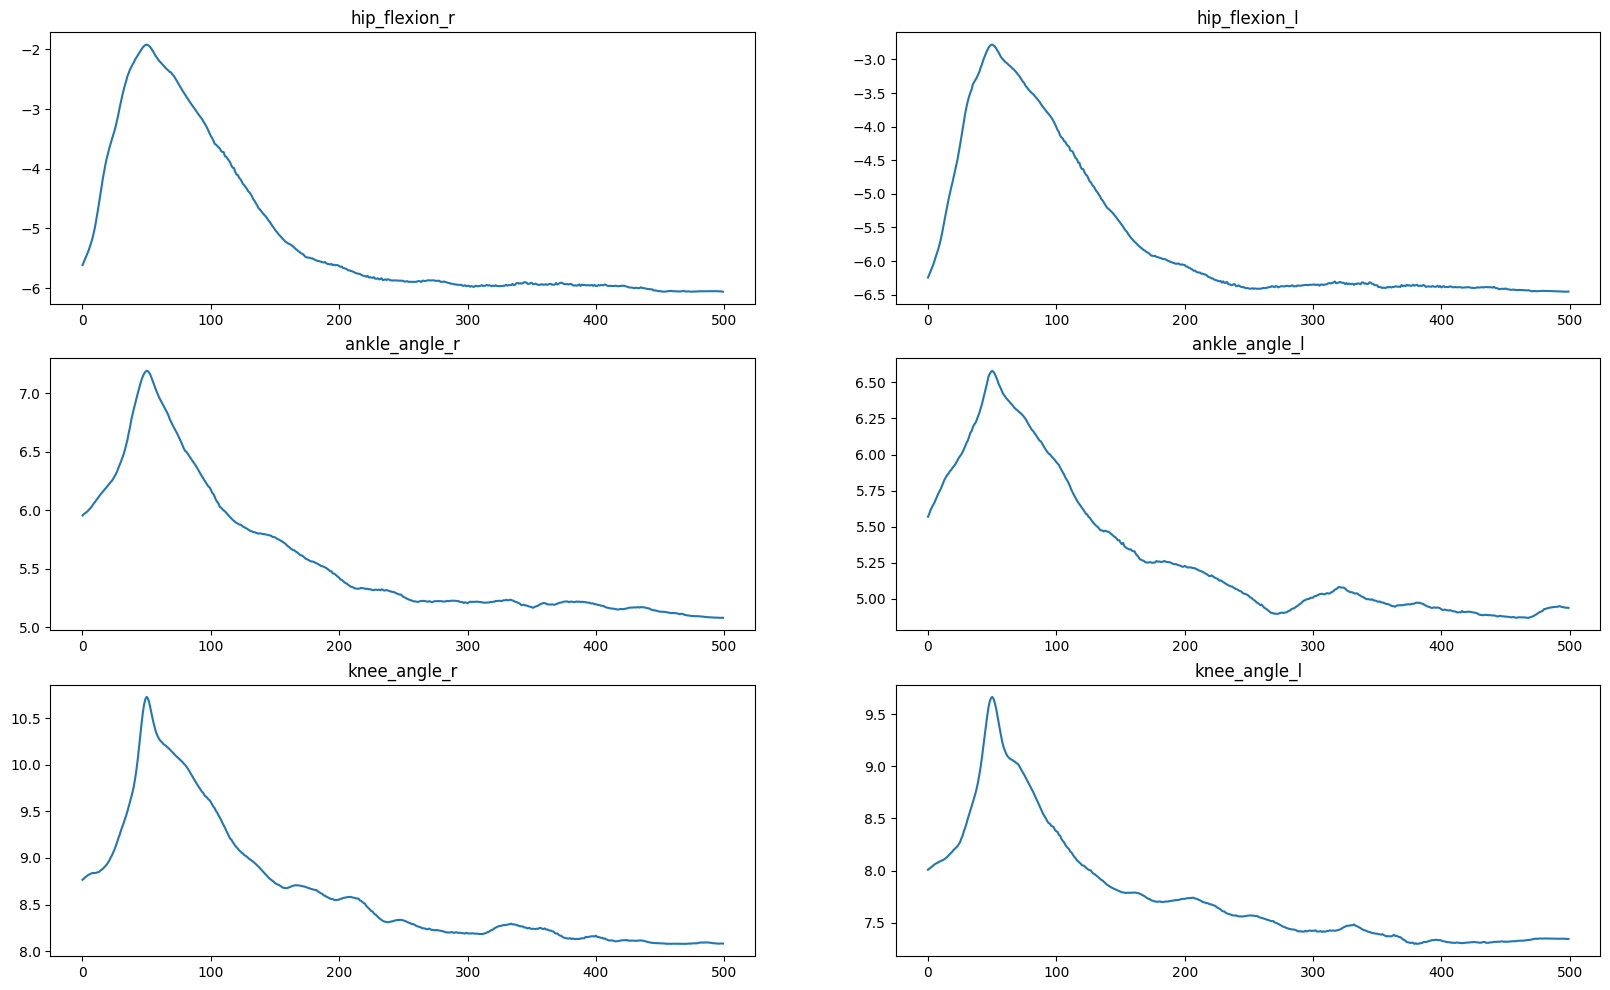

In [5]:
hip_flexion_l_new = []
hip_flexion_r_new = []
ankle_angle_l_new = []
ankle_angle_r_new = []
knee_angle_l_new = []
knee_angle_r_new = []

pre_len = 50

#time_mo  = np.linspace(0, len(mocap_hip_flex_l)/50, len(mocap_hip_flex_l))
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(20, 12))
length = 500
time_mo  = np.linspace(0, length/100, length)
for i in range(len(time)):
    argmax_hl = np.argmax(hip_flexion_l[i]) - pre_len
    hip_flexion_l_new.append(padding(time[i], hip_flexion_l[i][argmax_hl:], length))
    ax[0, 0].plot(padding(time[i], hip_flexion_l[i][argmax_hl:], length), label = 'hip_l')
    argmax_hr = np.argmax(hip_flexion_r[i]) - pre_len
    hip_flexion_r_new.append(padding(time[i], hip_flexion_r[i][argmax_hr:], length))
    ax[0, 1].plot(padding(time[i], hip_flexion_r[i][argmax_hr:], length), label = 'hip_r')
    #plt.xlim([5.5, 9])

    argmax_al = np.argmax(ankle_angle_l[i]) - pre_len
    ankle_angle_l_new.append(padding(time[i], ankle_angle_l[i][argmax_al:], length))
    ax[1, 0].plot(padding(time[i], ankle_angle_l[i][argmax_al:], length), label = 'ankle_l')
    argmax_ar = np.argmax(ankle_angle_r[i]) - pre_len
    ankle_angle_r_new.append(padding(time[i], ankle_angle_r[i][argmax_ar:], length))
    ax[1, 1].plot(padding(time[i], ankle_angle_r[i][argmax_ar:], length), label = 'ankle_r')

    argmax_kl = np.argmax(knee_angle_l[i]) - pre_len
    knee_angle_l_new.append(padding(time[i], knee_angle_l[i][argmax_kl:], length))
    ax[2, 0].plot(padding(time[i], knee_angle_l[i][argmax_kl:], length), label = 'knee_l')

    argmax_kr = np.argmax(knee_angle_r[i]) - pre_len
    knee_angle_r_new.append(padding(time[i], knee_angle_r[i][argmax_kr:], length))
    ax[2, 1].plot(padding(time[i], knee_angle_r[i][argmax_kr:], length), label = 'knee_r')


    ax[0, 0].set_title('hip_flexion_r')
    ax[0, 1].set_title('hip_flexion_l')
    ax[1, 0].set_title('ankle_angle_r')
    ax[1, 1].set_title('ankle_angle_l')
    ax[2, 0].set_title('knee_angle_r')
    ax[2, 1].set_title('knee_angle_l')

    #plt.xlim([5.5, 9])
plt.show()

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(20, 12))
ax[0, 0].plot(np.mean(hip_flexion_l_new, axis = 0))
ax[0, 1].plot(np.mean(hip_flexion_r_new, axis = 0))
ax[1, 0].plot(np.mean(ankle_angle_l_new, axis = 0))
ax[1, 1].plot(np.mean(ankle_angle_r_new, axis = 0))
ax[2, 0].plot(np.mean(knee_angle_l_new, axis = 0))
ax[2, 1].plot(np.mean(knee_angle_r_new, axis = 0))
ax[0, 0].set_title('hip_flexion_r')
ax[0, 1].set_title('hip_flexion_l')
ax[1, 0].set_title('ankle_angle_r')
ax[1, 1].set_title('ankle_angle_l')
ax[2, 0].set_title('knee_angle_r')
ax[2, 1].set_title('knee_angle_l')

In [6]:
def get_joint_info(file_path):
    header_end_line_num = 0
    with open(file_path, 'r') as file:
        for line_num, line in enumerate(file, 1):
            if 'endheader' in line.strip().lower():
                header_end_line_num = line_num
                break

    # Step 2: Reading Column Labels which is the first line after `endheader`
    with open(file_path, 'r') as file:
        for line_num, line in enumerate(file, 1):
            if line_num == header_end_line_num + 1:
                column_labels = line.strip().split('\t')
                break

    # Step 3: Loading the Data into a pandas DataFrame
    df = pd.read_csv(file_path, skiprows=header_end_line_num + 1, sep='\t', names=column_labels)
    time = df['time'].to_numpy()

    hip_flexion_r = df['hip_flexion_r_moment'].to_numpy()
    hip_flexion_l = df['hip_flexion_l_moment'].to_numpy()
    ankle_angle_r = df['ankle_angle_r_moment'].to_numpy()
    ankle_angle_l = df['ankle_angle_l_moment'].to_numpy()
    knee_angle_r = df['knee_angle_r_moment'].to_numpy()
    knee_angle_l = df['knee_angle_l_moment'].to_numpy()

    return time,hip_flexion_l,hip_flexion_r, ankle_angle_l, ankle_angle_r, knee_angle_l, knee_angle_r


time_moment, hip_flexion_r_moment, hip_flexion_l_moment, ankle_angle_r_moment, ankle_angle_l_moment = [], [], [], [], []
knee_angle_l_moment, knee_angle_r_moment = [], []

 
# import required module
import os
# assign directory
directory = './torque_data'
# iterate over files in
# that directory
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(f):
        results = get_joint_info(f)
        time_moment.append(results[0])
        hip_flexion_l_moment.append(results[1])
        hip_flexion_r_moment.append(results[2])
        ankle_angle_l_moment.append(results[3])
        ankle_angle_r_moment.append(results[4])
        knee_angle_l_moment.append(results[5])
        knee_angle_r_moment.append(results[6])
        print(f)
plt.show()

./torque_data\posterior_1_1 (2).sto
./torque_data\posterior_1_1 (3).sto
./torque_data\posterior_1_1 (4).sto
./torque_data\posterior_1_1 (5).sto
./torque_data\posterior_1_1 (6).sto
./torque_data\posterior_1_1 (7).sto
./torque_data\posterior_1_1 (8).sto
./torque_data\posterior_1_1 (9).sto
./torque_data\posterior_1_1.sto
./torque_data\posterior_1_2 (2).sto
./torque_data\posterior_1_2 (3).sto
./torque_data\posterior_1_2 (4).sto
./torque_data\posterior_1_2 (5).sto
./torque_data\posterior_1_2 (6).sto
./torque_data\posterior_1_2 (7).sto
./torque_data\posterior_1_2 (8).sto
./torque_data\posterior_1_2 (9).sto
./torque_data\posterior_1_2.sto
./torque_data\posterior_1_3 (2).sto
./torque_data\posterior_1_3 (3).sto
./torque_data\posterior_1_3 (4).sto
./torque_data\posterior_1_3.sto
./torque_data\posterior_1_4.sto


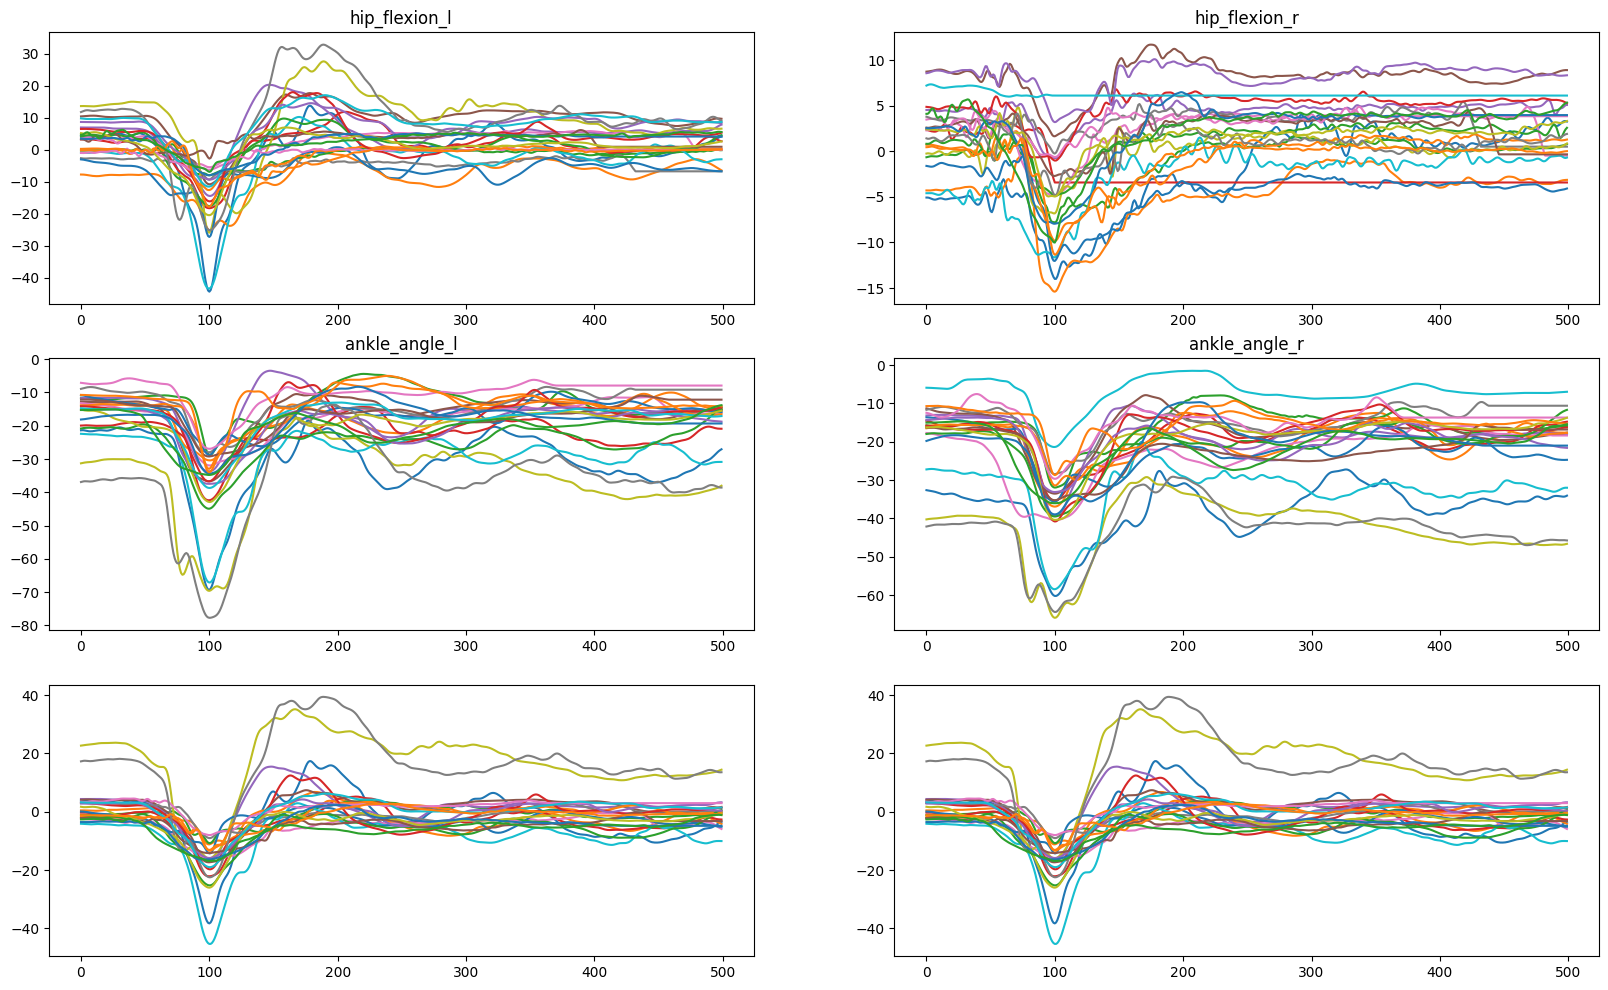

Text(0.5, 1.0, 'knee_angle_r')

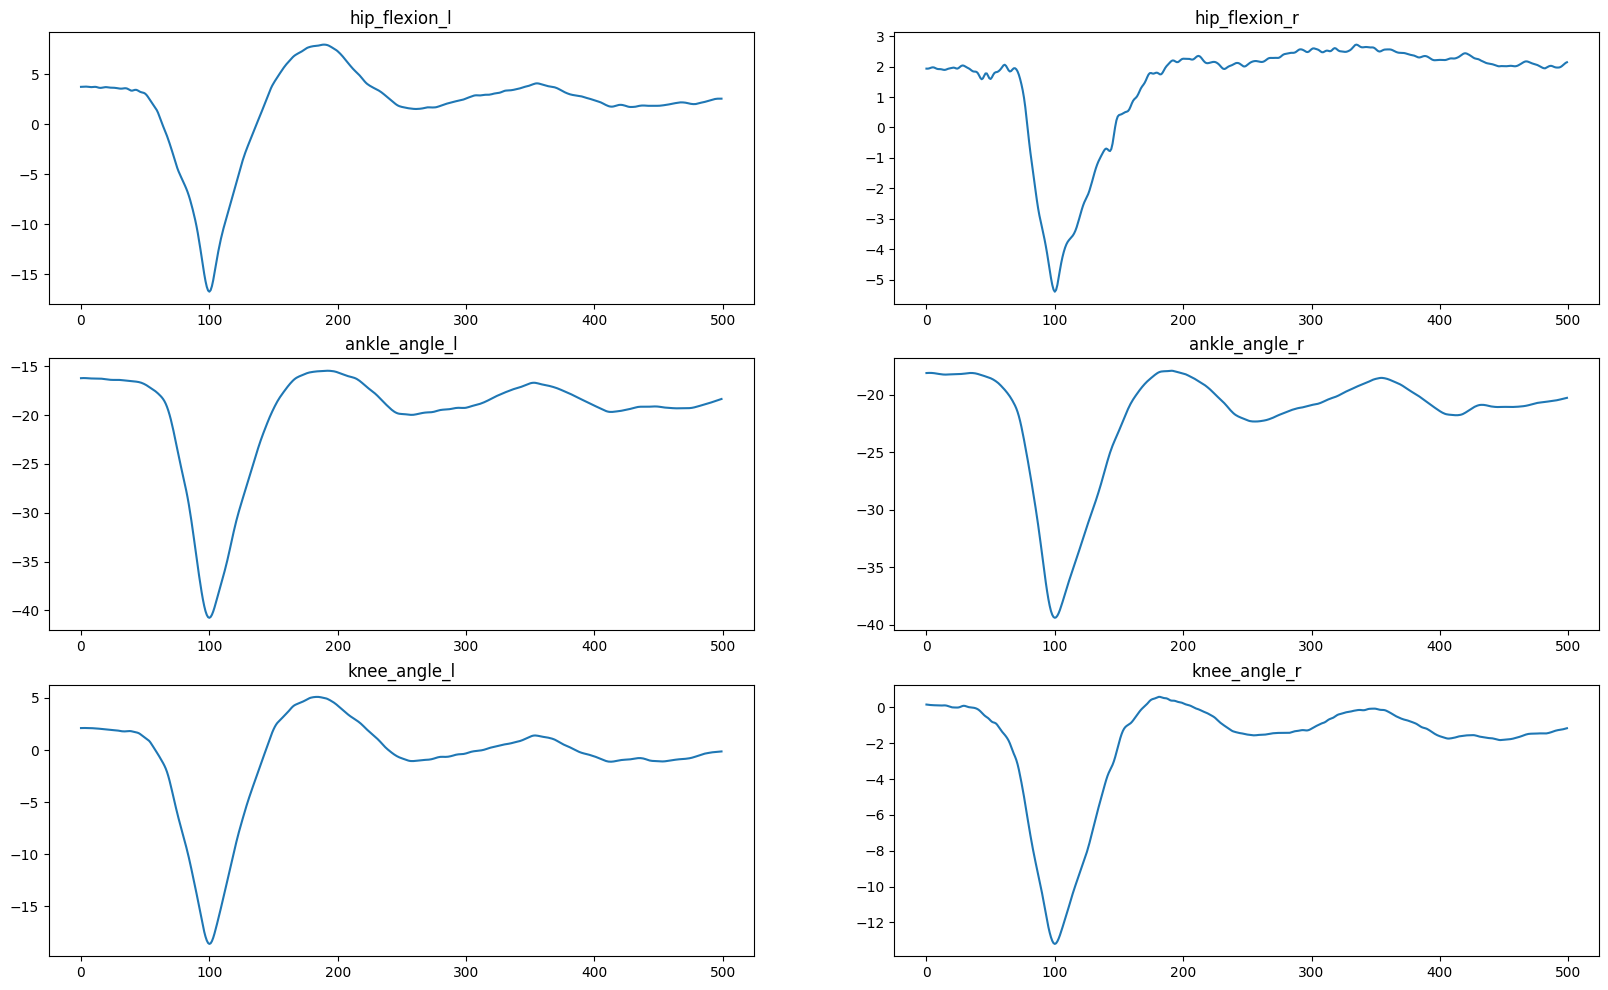

In [7]:
time_max, time_min = find_max_min_2d_list(time_moment)
time_length = max(len(sub_array) for sub_array in time_moment) - time_min*100
time_mome = np.linspace(time_max, time_min, int(time_length))

hip_flexion_l_m_new = []
hip_flexion_r_m_new = []
ankle_angle_l_m_new = []
ankle_angle_r_m_new = []
knee_angle_l_m_new = []
knee_angle_r_m_new = []

#time_mo  = np.linspace(0, len(mocap_hip_flex_l)/100, len(mocap_hip_flex_l))
pre_len = 100
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(20, 12))
time_mo  = np.linspace(0, length/100, length)
for i in range(len(hip_flexion_l_moment)):
    argmin_hl = np.argmin(hip_flexion_l_moment[i]) - pre_len

    hip_flexion_l_m_new.append(padding(time_moment[i], hip_flexion_l_moment[i][argmin_hl:], length))
    ax[0, 0].plot(padding(time_moment[i], hip_flexion_l_moment[i][argmin_hl:], length), label = 'hip_l')

    argmin_hr = np.argmin(hip_flexion_r_moment[i]) - pre_len
    hip_flexion_r_m_new.append(padding(time_moment[i], hip_flexion_r_moment[i][argmin_hr:], length))
    ax[0, 1].plot(padding(time_moment[i], hip_flexion_r_moment[i][argmin_hr:], length), label = 'hip_r')

    argmin_al = np.argmin(ankle_angle_l_moment[i]) - pre_len
    ankle_angle_l_m_new.append(padding(time_moment[i], ankle_angle_l_moment[i][argmin_al:], length))
    ax[1, 0].plot(padding(time_moment[i], ankle_angle_l_moment[i][argmin_al:], length), label = 'ankle_l')

    argmin_ar = np.argmin(ankle_angle_r_moment[i]) - pre_len
    ankle_angle_r_m_new.append(padding(time_moment[i], ankle_angle_r_moment[i][argmin_ar:], length))
    

    argmin_kl = np.argmin(knee_angle_l_moment[i]) - pre_len
    knee_angle_l_m_new.append(padding(time_moment[i], knee_angle_l_moment[i][argmin_kl:], length))
    ax[2, 0].plot(padding(time_moment[i], knee_angle_l_moment[i][argmin_kl:], length), label = 'knee_l')

    argmin_kr = np.argmin(knee_angle_r_moment[i]) - pre_len
    knee_angle_r_m_new.append(padding(time_moment[i], knee_angle_r_moment[i][argmin_kr:], length))
    ax[2, 1].plot(padding(time_moment[i], knee_angle_l_moment[i][argmin_kl:], length), label = 'knee_l')


    ax[1, 1].plot(padding(time_moment[i], ankle_angle_r_moment[i][argmin_ar:], length), label = 'ankle_r')
    ax[0, 0].set_title('hip_flexion_l')
    ax[0, 1].set_title('hip_flexion_r')
    ax[1, 0].set_title('ankle_angle_l')
    ax[1, 1].set_title('ankle_angle_r')
    #plt.xlim([5.5, 9])
plt.show()

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(20, 12))
ax[0, 0].plot(np.mean(hip_flexion_l_m_new, axis = 0))
ax[0, 1].plot(np.mean(hip_flexion_r_m_new, axis = 0))
ax[1, 0].plot(np.mean(ankle_angle_l_m_new, axis = 0))
ax[1, 1].plot(np.mean(ankle_angle_r_m_new, axis = 0))
ax[2, 0].plot(np.mean(knee_angle_l_m_new, axis = 0))
ax[2, 1].plot(np.mean(knee_angle_r_m_new, axis = 0))
ax[0, 0].set_title('hip_flexion_l')
ax[0, 1].set_title('hip_flexion_r')
ax[1, 0].set_title('ankle_angle_l')
ax[1, 1].set_title('ankle_angle_r')
ax[2, 0].set_title('knee_angle_l')
ax[2, 1].set_title('knee_angle_r')

In [8]:
import pickle
import numpy as np
import matplotlib
import matplotlib.path as mplPath
import matplotlib.pyplot as plt
import os
import math
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors


name = '2024_12_10_22_59_450PPO'#'2024_11_04_16_24_37' #'2024_06_11_15_11_25' 
env_name = 'myoTorsoReachFixed-v1'
steps = 1000
cut = 100

pkl_path = './output/PKL/' + env_name + '/'
ep = 100


def load_pickle(file_path):
    with open(file_path, 'rb') as file:
        return pickle.load(file)

image_path = './image/' + env_name + '/' + name
os.makedirs(image_path, exist_ok=True)

bins = [1, 2, 3, 4, 5]

In [9]:
AP_pert = []
AP_pert_1, ML_pert_1= [], []#this is only used for the scatter stand/fall plot
stand = []
fall = []
pert_1_AP, pert_2_AP, pert_3_AP, pert_4_AP, pert_5_AP = [], [], [], [], []
pert_1_ML, pert_2_ML, pert_3_ML, pert_4_ML, pert_5_ML = [], [], [], [], []
for i in range(ep):
    file_path = pkl_path + name+f'_{i}.pkl'  # Replace with actual file paths
    data = load_pickle(file_path)
    height = data['bodyInfo']['height']
    if height[-1] > 0.5:
        stand.append(data.copy())
    else:
        fall.append(data.copy())
    
    if data['modelInfo']['perturbationDirection'] == 1:
        AP_pert_1.append(data)
    else:
        ML_pert_1.append(data)

print(len(stand))
mass = 150

100


In [ ]:
for data in stand:
    AP_pert.append(data)
    data['jointInfo']['qacc'] = np.array(data['jointInfo']['qacc'])
    acc = np.max(abs(data['jointInfo']['qacc'][200:, -1]))
    #print(acc)
    if bins[0] <= acc <= bins[1]:
        pert_1_AP.append(data)
    elif bins[1] <= acc <= bins[2]:
        pert_2_AP.append(data)
    elif bins[2] <= acc <= bins[3]:
        pert_3_AP.append(data)
    elif bins[3] <= acc <= bins[4]:
        pert_4_AP.append(data)
    else:
        pert_5_AP.append(data)       

    
pert_AP = [pert_1_AP, pert_2_AP, pert_3_AP, pert_4_AP, pert_5_AP]
print(len(pert_1_AP))
ankle_angle_l, ankle_angle_r  = [], []#, hip_adduction_l, hip_adduction_r, hip_rotation_l, hip_rotation_r = [], [], [], [], [], []
hip_flexion_l, hip_flexion_r, knee_angle_l, knee_angle_r= [], [], [], []

joint_name_qpos = [ankle_angle_l, ankle_angle_r, hip_flexion_l, hip_flexion_r, knee_angle_l, knee_angle_r] #hip_adduction_l, hip_adduction_r, hip_rotation_l, hip_rotation_r,  

ankle_angle_l_t, ankle_angle_r_t, hip_adduction_l_t, hip_adduction_r_t, hip_rotation_l_t = [], [], [], [], []
hip_rotation_r_t, hip_flexion_l_t, hip_flexion_r_t, knee_angle_l_t, knee_angle_r_t= [], [], [], [], []

joint_name_torque = [ankle_angle_l_t, ankle_angle_r_t, hip_flexion_l_t, hip_flexion_r_t, knee_angle_l_t, knee_angle_r_t] #hip_adduction_l_t, hip_adduction_r_t, hip_rotation_l_t, hip_rotation_r_t, 


joint_names_l = ['ankle_angle_l',  'hip_flexion_l', 'knee_angle_l'] #'hip_adduction_l', 'hip_rotation_l',
title = ['Ankle',  'Hip Flexion', 'Knee'] #'Hip Adduction', 'Hip Rotation', 
joint_names_r = ['ankle_angle_r', 'hip_flexion_r' ,'knee_angle_r'] #'hip_adduction_r','hip_rotation_r',

3.672695006065266
2.395977638318796
4.283758451910481
3.5117215023979065
1.9573914683851974
3.319281152243159
2.0400506350858474
4.397666543681573
1.5817750976961107
3.5962364268559237
4.224389606670699
4.645910533366217
3.8407848504714233
2.602525036482578
4.871142585731422
1.3795580645864514
5.207777896060801
3.9253540925545094
2.9830121738422073
5.344326366902364
2.242010538493944
4.286476806134697
3.5326847853634566
5.272954536760287
1.373438150365908
5.030954608157189
0.9906742272694636
4.923138606397856
2.4321729691866083
4.440358868121683
1.0706924320672617
3.390067398028281
4.379391438769451
4.823340286838724
5.174950712180999
2.8247402667840666
1.6140088802521566
4.021201622697958
1.5496240550505804
3.169912310647759
2.333041784219154
2.025897278264805
3.332986018286274
4.846100115562112
2.569311867342229
2.872501148172786
3.873662988982884
1.3298832440145505
4.190797488595281
2.112699064308643
4.350372131947101
4.661633999182188
3.4976534099597942
1.8200719195239183
1.7998193

In [12]:
time_mo  = np.linspace(0, 5, 500)

500


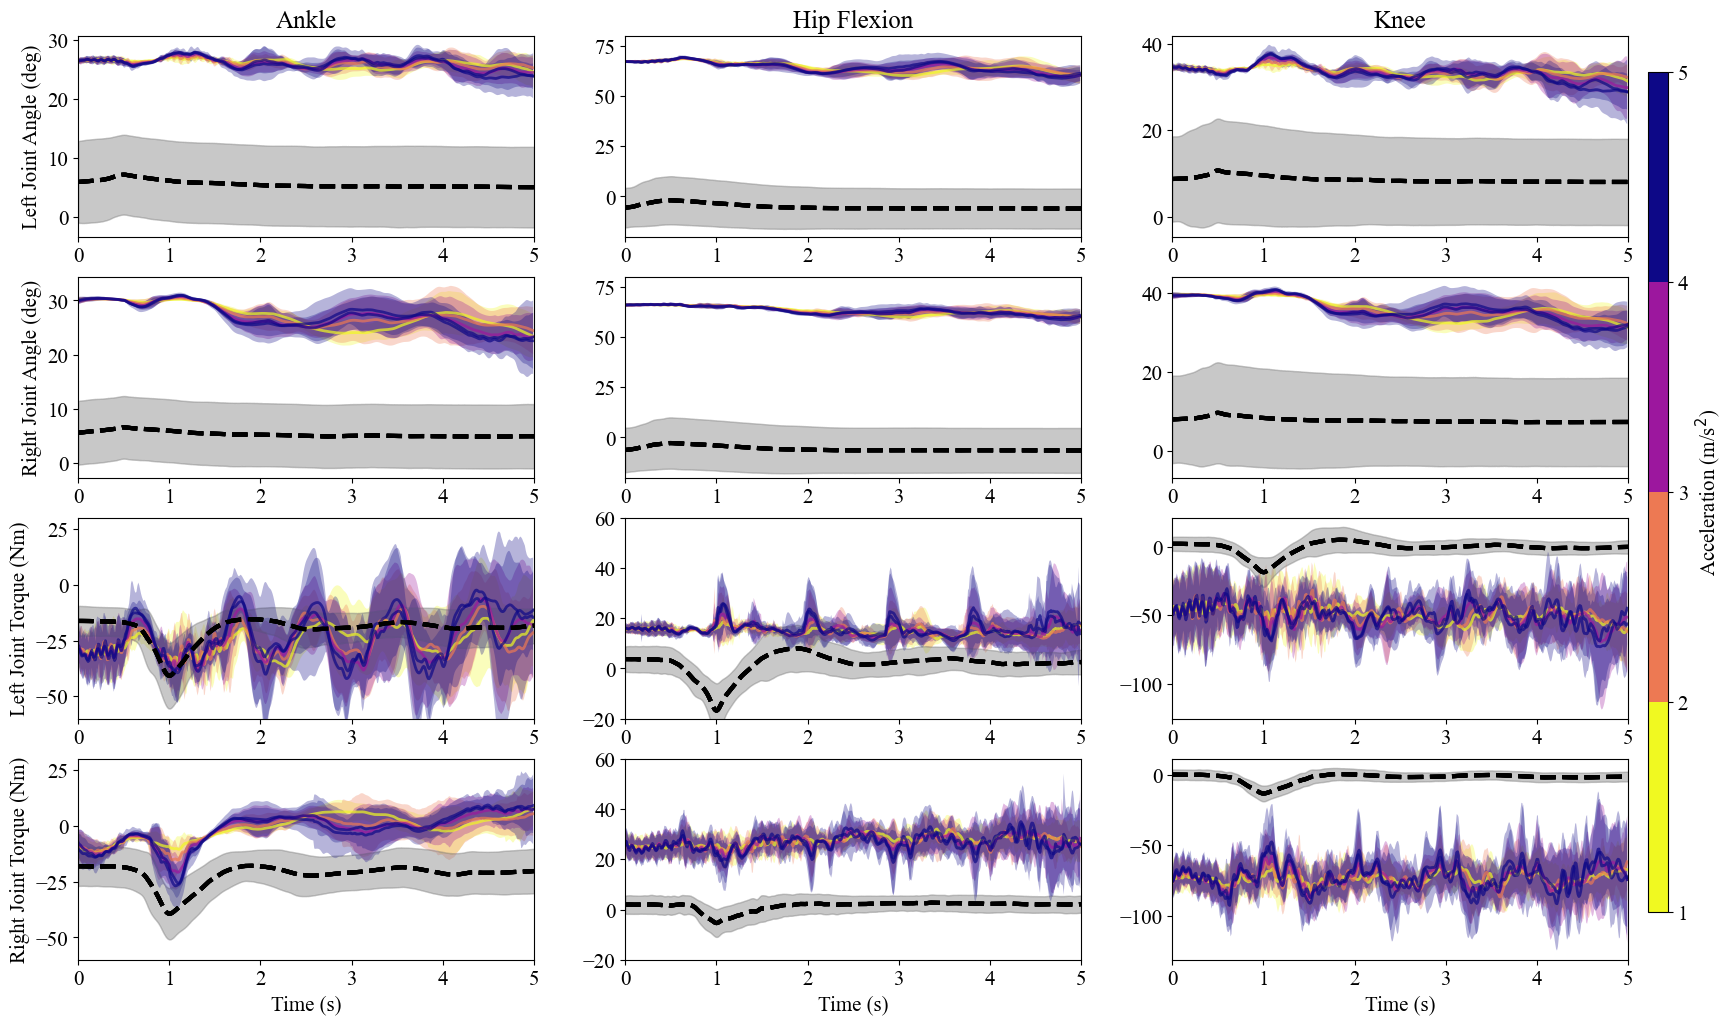

In [27]:
#####plotting the joint angle over time for standing up case
plt.rcParams.update({
    "font.family": "Times New Roman",  # specify font family here
    "font.size":15}) 

y_range_joint = [-50, 50]
time_len = 500
x_time = np.arange(0, time_len/100, 0.01)
print(len(x_time))

colormap = plt.cm.plasma_r
norm = mcolors.BoundaryNorm(bins, colormap.N)
fig, ax = plt.subplots(4, 3, figsize=(20, 12))
#fig= plt.figure(figsize=(20, 12))
for i in range(0, 3):
    plt.subplot(4, 3, i+1)
    for j in range(len(pert_AP)):
        l1, l2, l3, l4, l5 = [], [], [], [], []
        l = [l1, l2, l3, l4, l5]
        mean_pert = []
        for k in pert_AP[j]:
            p_t = int(k['modelInfo']['perturbationTime']*100) 
            #if fatigue:
                #p_t += 2200
            l[j].append(k['jointInfo']['qpos'][joint_names_l[i]][p_t:p_t+time_len])
            mean_pert.append(np.max(np.abs(k['jointInfo']['qacc'][200:, -1])))
        if not l[j]:
            continue
        else:
            mean = np.mean(l[j], axis = 0)*180/np.pi
            std = np.std(l[j], axis = 0)*180/np.pi
            upper = mean + 2*std
            lower = mean - 2*std
            plt.plot(x_time, np.mean(l[j], axis= 0)*180/np.pi, c = colormap(norm(np.mean(mean_pert))), alpha = 0.7, linewidth = 2)
            plt.fill_between(x_time, lower.flatten(), upper.flatten(), facecolor = colormap(norm(np.mean(mean_pert))), alpha = 0.3)
            if i == 1:
                mean_e = np.mean(hip_flexion_l_new, axis = 0)
                std_e = np.std(hip_flexion_l_new, axis = 0)
            elif i == 0:
                mean_e = np.mean(ankle_angle_l_new, axis = 0)
                std_e = np.std(ankle_angle_l_new, axis = 0)
            elif i == 2:
                mean_e = np.mean(knee_angle_l_new, axis= 0)
                std = np.std(knee_angle_l_new, axis= 0)
            plt.plot(time_mo, mean_e, linewidth = 3, color = 'black', linestyle = 'dashed')
            plt.fill_between(time_mo, mean_e-std_e, mean_e+std_e, color = 'grey', alpha = 0.1)
    plt.title(title[i])
    if i == 0:
        plt.ylabel('Left Joint Angle (deg)')

######

for i in range(0, 3):
    plt.subplot(4, 3, i+4)
    for j in range(len(pert_AP)):
        l1, l2, l3, l4, l5 = [], [], [], [], []
        l = [l1, l2, l3, l4, l5]
        mean_pert = []
        for k in pert_AP[j]:
            p_t = int(k['modelInfo']['perturbationTime']*100) 
            #if fatigue:
                #p_t += 2200
            l[j].append(k['jointInfo']['qpos'][joint_names_r[i]][p_t:p_t+time_len])
            mean_pert.append(np.max(np.abs(k['jointInfo']['qacc'][200:, -1])))
        if not l[j]:
            continue
        else:
            mean = np.mean(l[j], axis = 0)*180/np.pi
            std = np.std(l[j], axis = 0)*180/np.pi
            upper = mean + 2*std
            lower = mean - 2*std
            plt.plot(x_time, np.mean(l[j], axis= 0)*180/np.pi, c = colormap(norm(np.mean(mean_pert))), alpha = 0.7, linewidth = 2)
            plt.fill_between(x_time, lower.flatten(), upper.flatten(), facecolor = colormap(norm(np.mean(mean_pert))), alpha = 0.3)
            if i == 1:
                mean_e = np.mean(hip_flexion_r_new, axis = 0)
                std_e = np.std(hip_flexion_r_new, axis = 0)
            elif i == 0:
                mean_e = np.mean(ankle_angle_r_new, axis = 0)
                std_e = np.std(ankle_angle_r_new, axis = 0)
            elif i == 2:
                mean_e = np.mean(knee_angle_r_new, axis= 0)
                std = np.std(knee_angle_r_new, axis= 0)
            plt.plot(time_mo, mean_e, linewidth = 3, color = 'black', linestyle = 'dashed')
            plt.fill_between(time_mo, mean_e-std_e, mean_e+std_e, color = 'grey', alpha = 0.1)

    if i == 0:
        plt.ylabel('Right Joint Angle (deg)')


for i in range(0, 3):
    plt.subplot(4, 3, i+7)
    for j in range(len(pert_AP)):
        mean_pert = []
        l1, l2, l3, l4, l5 = [], [], [], [], []
        l = [l1, l2, l3, l4, l5]
        for k in pert_AP[j]:
            p_t = int(k['modelInfo']['perturbationTime']*100) 
            #if fatigue:
                #p_t += 2200
            l[j].append(k['jointInfo']['qtau'][joint_names_l[i]][p_t:p_t+time_len])
            mean_pert.append(np.max(np.abs(k['jointInfo']['qacc'][200:, -1])))
        if not l[j]:
            continue
        else:
            mean = np.mean(l[j], axis = 0)
            std = np.std(l[j], axis = 0)
            upper = mean + 2*std
            lower = mean - 2*std
            plt.plot(x_time, np.mean(l[j], axis= 0), c = colormap(norm(np.mean(mean_pert))), alpha = 0.7, linewidth = 2)
            plt.fill_between(x_time, lower.flatten(), upper.flatten(), facecolor = colormap(norm(np.mean(mean_pert))), alpha = 0.3)
            if i == 1:
                mean_e = np.mean(hip_flexion_l_m_new, axis = 0)
                std_e = np.std(hip_flexion_l_m_new, axis = 0)
            elif i == 0:
                mean_e = np.mean(ankle_angle_l_m_new, axis = 0)
                std_e = np.std(ankle_angle_l_m_new, axis = 0)
            elif i == 2:
                mean_e = np.mean(knee_angle_l_m_new, axis= 0)
                std = np.std(knee_angle_l_m_new, axis= 0)
            plt.plot(time_mo, mean_e, linewidth = 3, color = 'black', linestyle = 'dashed')
            plt.fill_between(time_mo, mean_e-std_e, mean_e+std_e, color = 'grey', alpha = 0.1)
    if i == 0:
        plt.ylabel('Left Joint Torque (Nm)')


for i in range(0, 3):
    plt.subplot(4, 3, i+10)
    for j in range(len(pert_AP)):
        mean_pert = []
        l1, l2, l3, l4, l5 = [], [], [], [], []
        l = [l1, l2, l3, l4, l5]
        for k in pert_AP[j]:
            p_t = int(k['modelInfo']['perturbationTime']*100)
            #if fatigue:
                #p_t += 2200
            l[j].append(k['jointInfo']['qtau'][joint_names_r[i]][p_t:p_t+time_len])
            mean_pert.append(np.max(np.abs(k['jointInfo']['qacc'][200:, -1])))
        if not l[j]:
            continue
        else:
            mean = np.mean(l[j], axis = 0)
            std = np.std(l[j], axis = 0)
            upper = mean + 2*std
            lower = mean - 2*std
            plt.plot(x_time, np.mean(l[j], axis= 0), c = colormap(norm(np.mean(mean_pert))), alpha = 0.7, linewidth = 2)
            plt.fill_between(x_time, lower.flatten(), upper.flatten(), facecolor = colormap(norm(np.mean(mean_pert))), alpha = 0.3)
            plt.xlabel('Time (s)')
            if i == 1:
                mean_e = np.mean(hip_flexion_r_m_new, axis = 0)
                std_e = np.std(hip_flexion_r_m_new, axis = 0)
            elif i == 0:
                mean_e = np.mean(ankle_angle_r_m_new, axis = 0)
                std_e = np.std(ankle_angle_r_m_new, axis = 0)
            elif i == 2:
                mean_e = np.mean(knee_angle_r_m_new, axis= 0)
                std = np.std(knee_angle_r_m_new, axis= 0)
            plt.plot(time_mo, mean_e, linewidth = 3, color = 'black', linestyle = 'dashed')
            plt.fill_between(time_mo, mean_e-std_e, mean_e+std_e, color = 'grey', alpha = 0.1)
    if i == 0:
        plt.ylabel('Right Joint Torque (Nm)')

sm = plt.cm.ScalarMappable(cmap=colormap, norm=norm) 
sm.set_array([]) 

plt.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.91, 0.15, 0.01, 0.7])
cbar = plt.colorbar(sm, ticks=np.linspace(1, 5, 5), cax=cbar_ax) 
cbar.set_label(r'Acceleration (m/s$^2$)')


ax[2, 0].set_ylim(-60, 30)
ax[3, 0].set_ylim(-60, 30)
ax[0, 1].set_ylim(-20, 80)
ax[1, 1].set_ylim(-20, 80)
ax[2, 1].set_ylim(-20, 60)
ax[3, 1].set_ylim(-20, 60)

#txt="The ankle and hip angles (adduction, rotation and flexion) in response to perturbation in the range of 10  - 60N"
#plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=20)
plt.setp(ax, xlim=[0, time_len/100])
plt.show()
plt.close()